## Homework 2
# Generate Random Points Clustered around a Straight Line

The objective of this exercise is to lay the foundation for our case study on demand estimation. In order to construct a demand estimation model we will need data to build the model with. Getting real data can be potentially very expensive. For that analysts often use simulated data that can be easily generated and used during model construction. This will help the analyst understand how the model would behave under various circumstances.

## Problem
Write a function <code>linear_scatter <- function (m, c, n) {…}</code>

The function should return a a collection of n points that are randomly distributed around a straight line with slope m, intercept c.

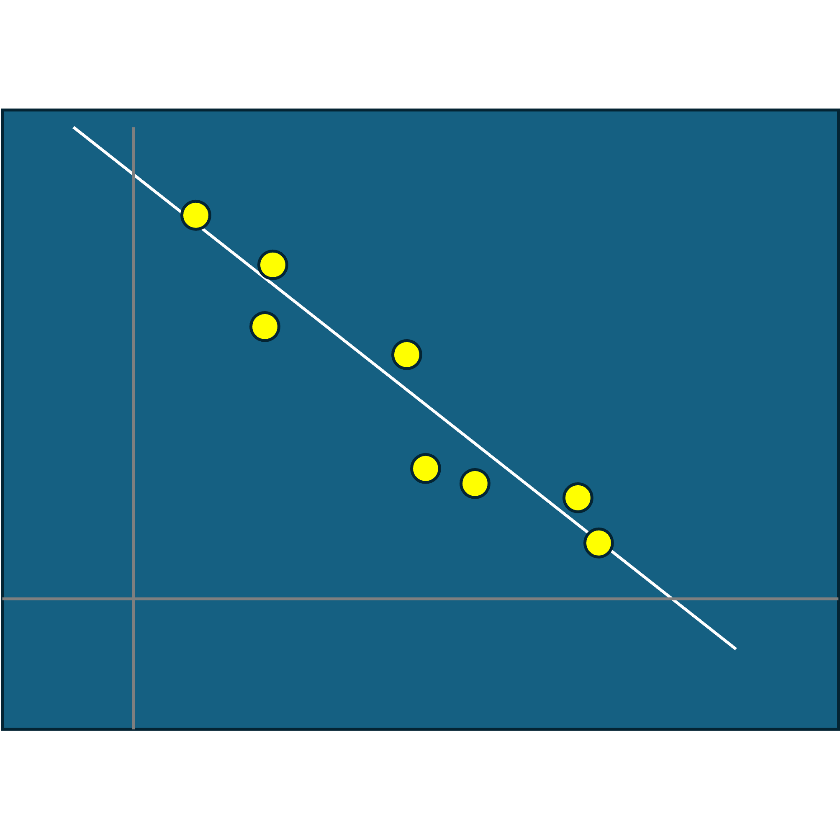

In [13]:
if (!requireNamespace("png", quietly = TRUE)) {
  install.packages("png")
}
library(png)
library(grid)

img <- readPNG("linear-scatter.png")
grid.raster(img)



## Solution Outline
To do this first generate a set of n points that are uniformly distributed from 0 to the intercept of the line with the x axis. In this case that is –c/m. Hint use the runif function. Then generate two sets of error deltas that are sampled from a normal distribution. Hint use the function rnorm.  The mean of the distribution should be zero. You can allow the standard deviation to change so that points can be generated more tightly or loosely around the line.

Finally add ex values and ey values to the x,y values you generated earlier. Return these points as a vector list or ideally a data frame.

## Sampling from a Random Distribution

We're going have to generate random numbers that conform to a couple types of random distribution. So let's figure that out first.

### Uniformly Distributed Random Numbers
The first step is to generate uniformly distributed random numbers. R provides a builtin function called <code>runif()</code> (stands for r - uniform) that does this.

Here's how you can use it:

In [15]:
x_values <- runif(10, min=0, max=10)
print(x_values)

 [1] 6.512550 8.978536 4.163608 4.390028 3.530746 5.294164 1.672441 7.992263
 [9] 2.941915 5.539876


Now we need to compute min and max that are appropriate for our line. Assuming that the slope of our line is negative. Then the line intercepts the x axis at <code>-m/c</code>.  Let's do that.

In [20]:
# Play around with m and c so you get max_x ~10 ish.
# This is just so that the graph looks nice.
m <- -40
c <- 3
max_x <- -m/c
print(max_x)
x_values <- runif(10, min=0, max=max_x)
print(x_values)

[1] 13.33333
 [1]  4.355298  6.022205  6.113330 10.176521 10.286733 12.554721  9.487052
 [8]  9.502266  1.038112  1.532207


### Sampling from a Normal Distribution

Sampling from a normal distribution is very similar except that we need to use the <code>rnorm</code> function (stands for r-normal.)  The rnorm function expacts a mean, and a standard deviation to be specified. Since we want our noise terms to be normally distributed about 0. Our mean will be zero. We can play around the standard deviation value to get more, or less scatter, as desired.


In [67]:
sigma <- 3.0
errors <- rnorm(10, mean=0, sd=sigma)
print(errors)

 [1]  0.6272767 -1.0932305 -1.4580821  1.1450922 -1.1173393  3.0416611
 [7]  4.7887121  5.3052383 -1.9836229 -2.6856972


The next step is to write the function that generates the actual points. It's not particularly complicated.

In [102]:
linear_scatter <- function(m, c, sigma, n) {
  x <- runif(n, 0, -c/m)  # sample x values
  y <- m * x + c + rnorm(n, 0, sigma) # line plus Gaussian noise
  data.frame(x, y)
}

m <- -20/17
c <- 20
sigma <- 2.0
n <- 25
points <- linear_scatter(m, c, sigma, n)
print(points)

            x          y
1   6.4591088 14.0704235
2   2.3916883 17.9161998
3  10.9833615  6.4319456
4   7.3084506  8.2192863
5   3.1386447 14.6653102
6  14.7835104  2.0912404
7  10.0741945  7.3584848
8   0.1593814 16.6301687
9  10.4329196 10.5701928
10 10.4956426  6.0102021
11 11.9089724  8.0611171
12  5.4255068 15.7861184
13 10.9039465  4.4486478
14 10.3389375  9.1228326
15  1.8514927 20.7131441
16 15.5834206 -0.3471794
17  3.6844323 16.6943069
18  2.4499469 11.2435974
19  7.2759452 10.8063013
20  9.0335473  8.9284693
21 16.4902722  3.1925861
22 14.0529849  2.0361005
23  7.4038656 10.5932298
24  7.7075630  8.3155634
25  7.7344131 11.5521889


We can plot the points to see what was generated.

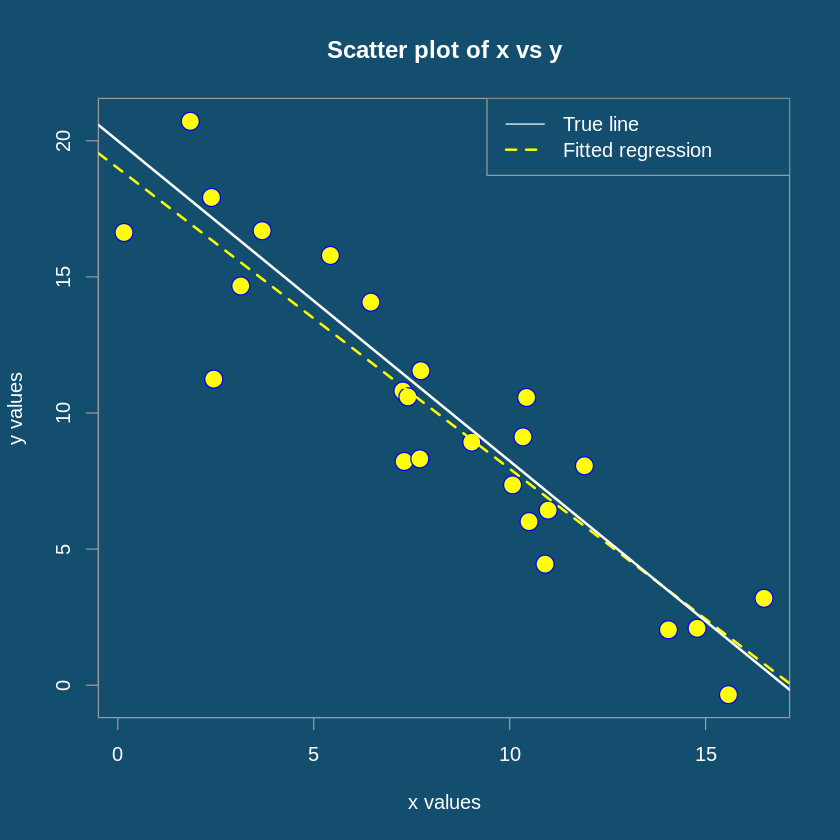

In [119]:
par(bg = "#144e6f", fg="#999999")
plot(points$x, points$y,
     main = "Scatter plot of x vs y",
     xlab = "x values",
     ylab = "y values",
     pch = 21,      # solid circle with border
     col = "blue",
     bg = "yellow", #144e6f
     cex = 2,
     col.axis = "white",
     col.lab =  "white",
     col.main = "white")
regression <- lm(y ~ x, data = points)
abline(regression, col = "yellow", lwd = 2, lty = 2)
abline(a = c, b = m, col = "white", lwd = 2, lty = 1)  # true line
legend("topright",                  # position of the legend
       legend = c("True line", "Fitted regression"),  # labels
       col = c("white", "yellow"),      # line colors
       lty = c(1, 2),                # line types
       lwd = c(1, 2),
       text.col = c("white", "white"))                # line widths